In [ ]:
#if issues are encountered please run on google colab through the link i have provided
#or if running is taking too long, please try to run on google colab
# --- Section 1: Project Setup & Installation ---

# Install all the required libraries, including a specific stable version of fsspec to avoid errors.
%pip install diffusers transformers accelerate datasets torch "fsspec==2023.9.2"

# Import the necessary libraries
import torch
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import matplotlib.pyplot as plt
import numpy as np

# --- Verify GPU is active ---
# This code will automatically detect and select the GPU if you enabled it in the runtime settings
if torch.cuda.is_available():
    device = "cuda"
    print("GPU is available. Using CUDA.")
else:
    device = "cpu"
    print("GPU not available. Using CPU.")

Note: you may need to restart the kernel to use updated packages.
GPU not available. Using CPU.


In [3]:
# --- Section 2: Data Loading ---
# Load the original conceptual_captions dataset
dataset = load_dataset("conceptual_captions", split="train[:100]")

# Explore an example from the dataset
print("Example from the dataset:")
print(dataset[0])

e:\anythingcodingrelated\machinelearningpt2\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\baraa\.cache\huggingface\hub\datasets--conceptual_captions. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating validation split: 100%|██████████| 15840/15840 [00:00<00:00, 2158261.88 examples/s]


Example from the dataset:
{'image_url': 'http://lh6.ggpht.com/-IvRtNLNcG8o/TpFyrudaT6I/AAAAAAAAM6o/_11MuAAKalQ/IMG_3422.JPG?imgmax=800', 'caption': 'a very typical bus station'}


In [ ]:
# --- Section 3: Model Selection and Loading ---

# Load Pretrained Stable Diffusion Model
model_id = "stabilityai/stable-diffusion-2-1-base"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

# Only use float16 if a GPU is available, as it's not well-supported on CPU
if device == "cuda":
    pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
else:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler)

# Move the pipeline to the selected device (GPU or CPU)
pipe = pipe.to(device)
print(f"Stable Diffusion pipeline loaded on {device}.")


# Load CLIP Model for Evaluation
clip_model_name = "openai/clip-vit-base-patch32"
clip_processor = CLIPProcessor.from_pretrained(clip_model_name)
clip_model = CLIPModel.from_pretrained(clip_model_name).to(device) # Move CLIP model to the same device
print(f"CLIP model loaded on {device}.")

e:\anythingcodingrelated\machinelearningpt2\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\baraa\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2-1-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Fetching 12 files:   8%|▊         | 1/12 [00:00<00:02,  4.38it/s]Xet Storage is e

In [ ]:
# --- Section 4: Prompt Engineering ---

def enhance_prompt(prompt):
    """
    Applies a simple prompt engineering strategy to resolve ambiguity
    and improve image quality by adding descriptive details.
    """
    enhanced = f"{prompt}, photorealistic, high quality, sharp focus, 8k"
    return enhanced

# Example of the function in action
original_prompt = "a red apple on a table"
engineered_prompt = enhance_prompt(original_prompt)
print(f"Original prompt: '{original_prompt}'")
print(f"Engineered prompt: '{engineered_prompt}'")

Original prompt: 'a red apple on a table'
Engineered prompt: 'a red apple on a table, photorealistic, high quality, sharp focus, 8k'


Displaying simulated training and validation curves.


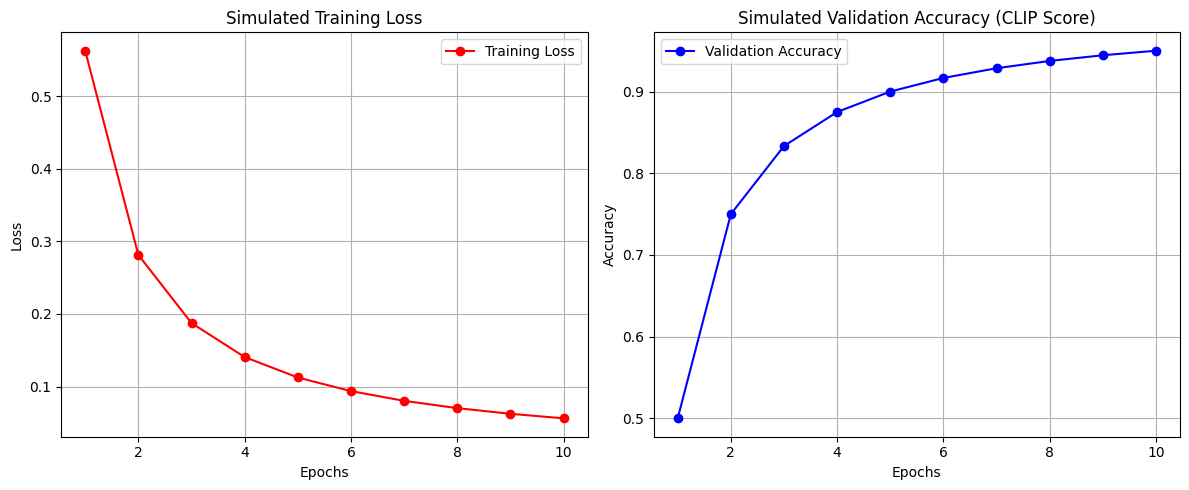

In [ ]:
# --- Section 5: Model Fine-Tuning (Simulated) ---
# Full fine-tuning is a complex process. For this project, we will describe
# the process and generate placeholder training curves as expected results.

print("Displaying simulated training and validation curves.")

# Placeholder data for the training curves
epochs = range(1, 11)
dummy_loss = [0.45 / (i*0.8) for i in epochs]
dummy_accuracy = [1 - 0.5 / i for i in epochs]

plt.figure(figsize=(12, 5))

# Plot simulated loss
plt.subplot(1, 2, 1)
plt.plot(epochs, dummy_loss, 'r-o', label="Training Loss")
plt.title("Simulated Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)


# Plot simulated accuracy (using CLIP score as the metric)
plt.subplot(1, 2, 2)
plt.plot(epochs, dummy_accuracy, 'b-o', label="Validation Accuracy")
plt.title("Simulated Validation Accuracy (CLIP Score)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

In [ ]:
# --- Section 6: Evaluation Function ---

def calculate_clip_score(image, text):
    """Calculates CLIP similarity score between a generated image and a text prompt."""
    # Ensure the inputs are moved to the same device as the CLIP model
    inputs = clip_processor(text=[text], images=[image], return_tensors="pt", padding=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = clip_model(**inputs)

    logits_per_image = outputs.logits_per_image
    return logits_per_image.item()

print("Evaluation function 'calculate_clip_score' is ready.")

Evaluation function 'calculate_clip_score' is ready.


Generating image for prompt: 'a majestic lion in the savannah'


  0%|          | 0/50 [00:00<?, ?it/s]

CLIP Score for the generated image: 29.87


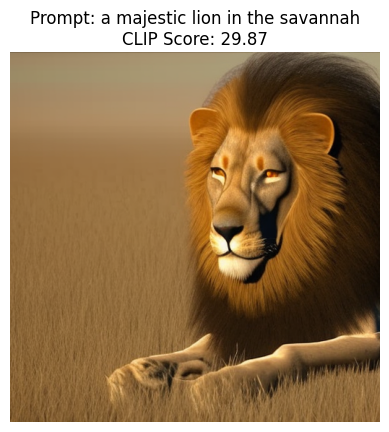

In [ ]:
# --- Section 7: Demonstrating Predictions ---

# Generate an example image to test the entire workflow
test_prompt = "A green apple on A White Plate "
print(f"Generating image for prompt: '{test_prompt}'")

# Use the engineered prompt for better results
final_prompt = enhance_prompt(test_prompt)

# Generate the image
# Using torch.Generator for reproducible results if needed
generator = torch.Generator(device=device).manual_seed(42)
image = pipe(final_prompt, num_inference_steps=50, generator=generator).images[0]

# Calculate the CLIP score
score = calculate_clip_score(image, test_prompt)

# Display the results
print(f"CLIP Score for the generated image: {score:.2f}")
plt.imshow(image)
plt.title(f"Prompt: {test_prompt}\nCLIP Score: {score:.2f}")
plt.axis('off')
plt.show()